import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
%matplotlib inline
import dmba
from dmba import plotDecisionTree, classificationSummary

## EbayAuctions

In [81]:
ebayauctions_df = pd.read_csv('eBayAuctions.csv')

ebayauctions_df.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


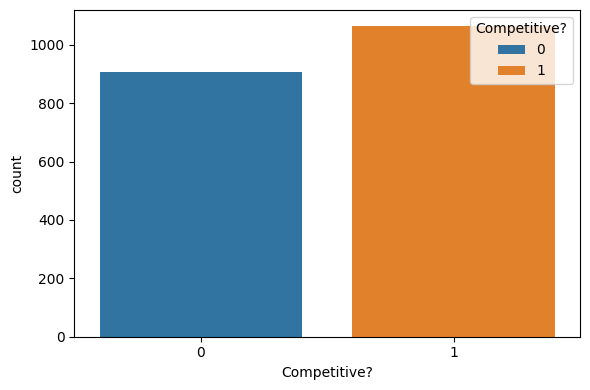

In [82]:
plt.figure(figsize=(6,4))
sns.countplot(x='Competitive?', hue='Competitive?', data=ebayauctions_df)
plt.tight_layout()
plt.show()

In [4]:
ebayauctions_df['Category'].unique()

array(['Music/Movie/Game', 'Automotive', 'SportingGoods', 'Home/Garden',
       'Books', 'Collectibles', 'Business/Industrial', 'Toys/Hobbies',
       'Electronics', 'Computer', 'EverythingElse',
       'Clothing/Accessories', 'Coins/Stamps', 'Antique/Art/Craft',
       'Jewelry', 'Pottery/Glass', 'Health/Beauty', 'Photography'],
      dtype=object)

In [5]:
len(ebayauctions_df)

1972

In [6]:
ebayauctions_df.isna().sum()

Category        0
currency        0
sellerRating    0
Duration        0
endDay          0
ClosePrice      0
OpenPrice       0
Competitive?    0
dtype: int64

In [7]:
# encode the categorical columns

ebayauctions_df_encoded = pd.get_dummies(ebayauctions_df, columns=['Category', 'currency', 'endDay'], prefix=None)

In [8]:
# Making a generic function to split the dataset and train-evaluate the model
def train_and_evaluate(X, y):
    # Perform the train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

    classTree = DecisionTreeClassifier(random_state=0, max_depth=7, min_samples_split=50)

    # Fit the model
    classTree.fit(X_train, y_train)

    # Make predictions
    y_preds = classTree.predict(X_test)

    # Return the model, test set, and predictions
    return classTree, y_test, y_preds, X_test

In [9]:
# split into X and y

X = ebayauctions_df_encoded.drop(['Competitive?'], axis=1)
y = ebayauctions_df_encoded['Competitive?']

In [10]:
classTree, y_test, y_preds, X_test = train_and_evaluate(X, y)

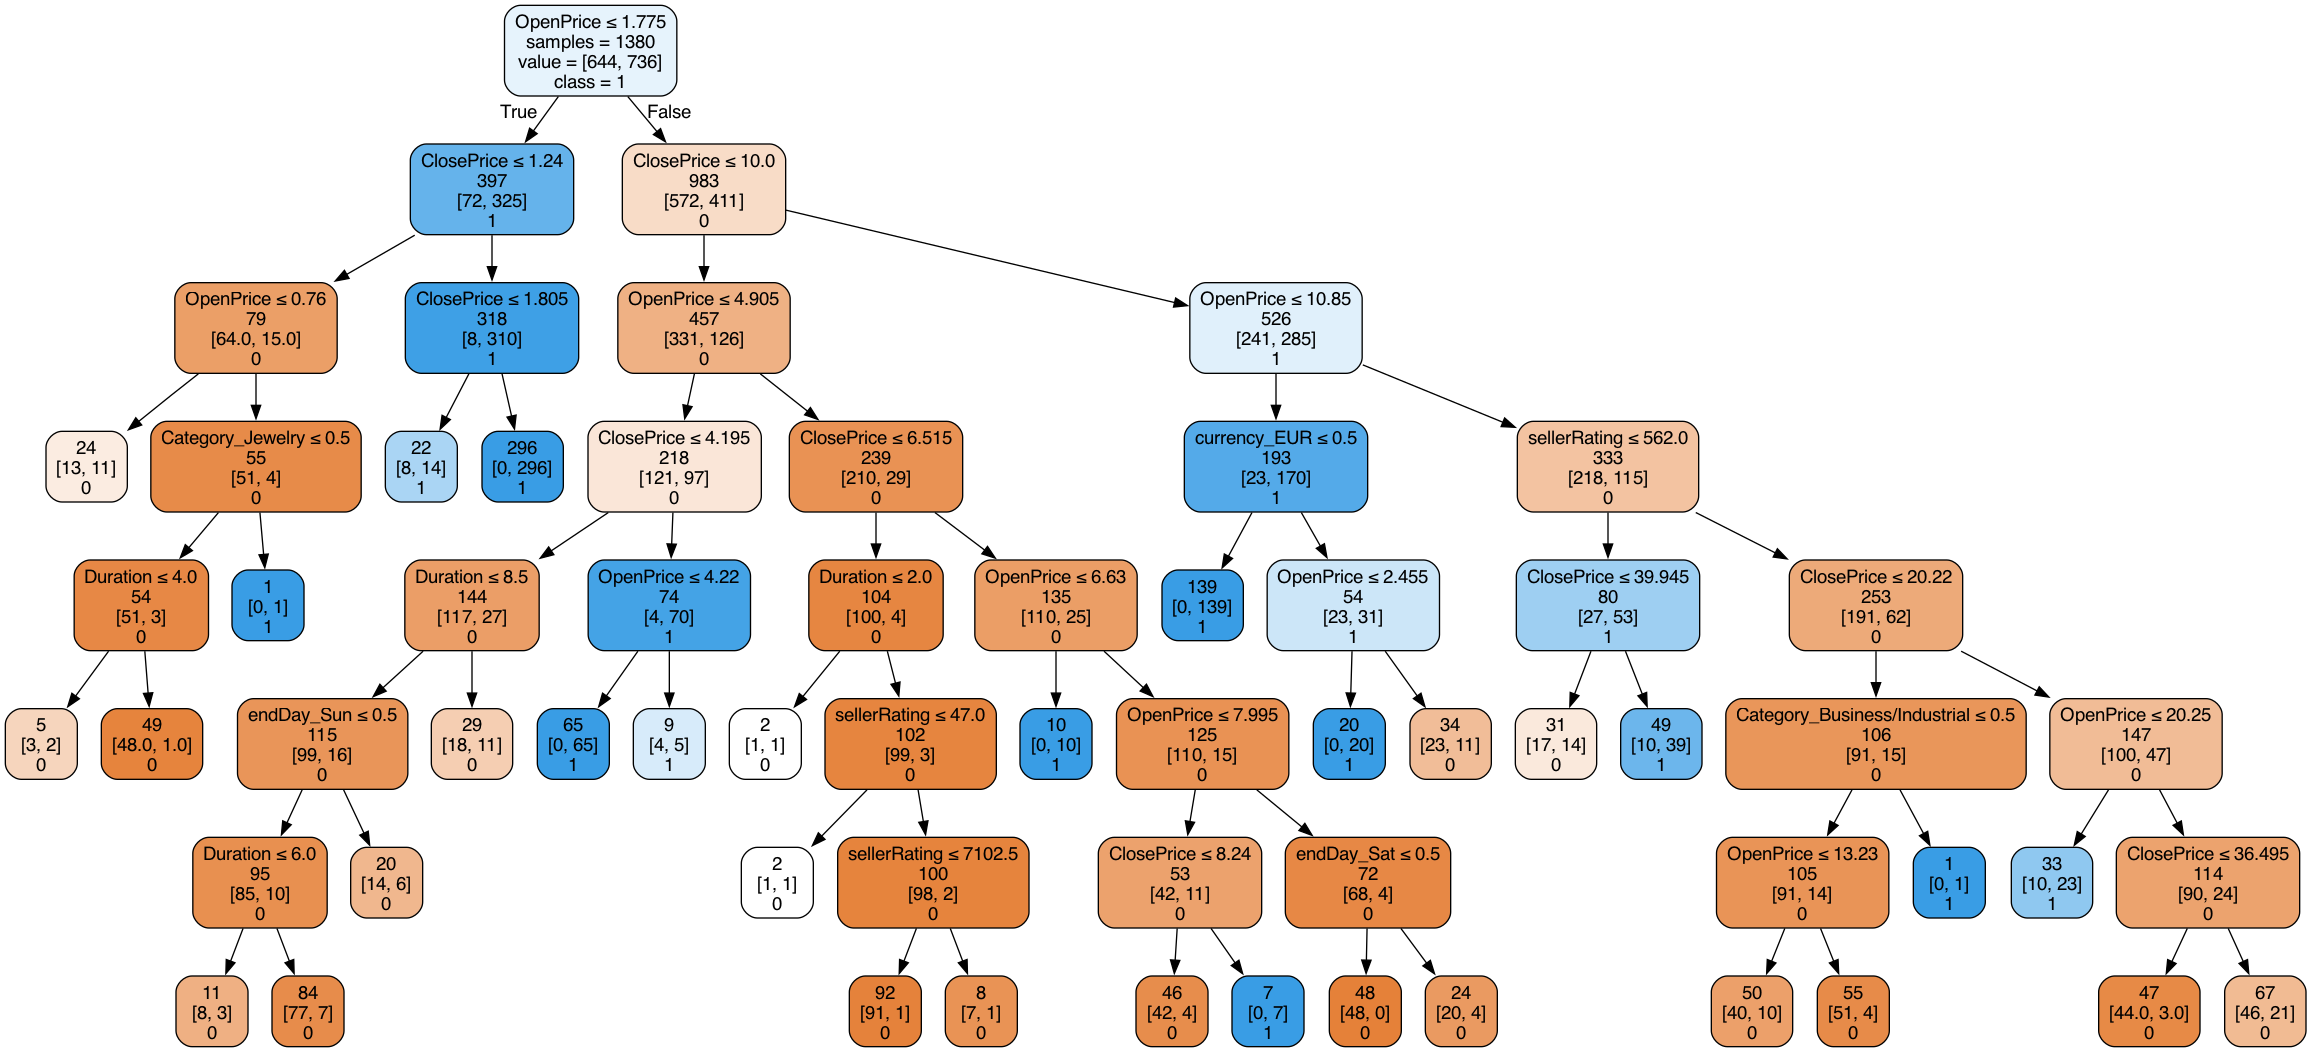

In [11]:
# print("Classes: {}".format(', '.join(classTree.classes_)))
plotDecisionTree(classTree, feature_names=ebayauctions_df_encoded.columns.drop('Competitive?'), class_names=classTree.classes_)

The tree starts with the root node which checks for the `OpenPrice` feature. The tree is split into two parts based on this - 
data where the `OpenPrice` is less than 1.775 and data where the `OpenPrice` is more than 1.775. 
    
There are 1380 samples in the root node
and out of those 736 are have 1 as the target class and 644 have 0 as the target class. Since class 1 has more samples than class 0, the predicted class for this node is 1.

In the left node there are 397 values which have `OpenPrice` less than 1.775 and out of those 325 belong to class 1 and 72 belong to class 0. Since class 1 has more samples than class 0 in this node, the predicted class for this node is 1.

In the right node there are 983 values which have `OpenPrice` greater 1.775 and out of those 411 belong to class 1 and 572 belong to class 0. Since class 0 has more samples than class 1 in this node, the predicted class for this node is 0.

In [12]:
print(classificationSummary(y_test, y_preds))

Confusion Matrix (Accuracy 0.8446)

       Prediction
Actual   0   1
     0 241  21
     1  71 259
None


In [13]:
classTree.feature_names_in_

array(['sellerRating', 'Duration', 'ClosePrice', 'OpenPrice',
       'Category_Antique/Art/Craft', 'Category_Automotive',
       'Category_Books', 'Category_Business/Industrial',
       'Category_Clothing/Accessories', 'Category_Coins/Stamps',
       'Category_Collectibles', 'Category_Computer',
       'Category_Electronics', 'Category_EverythingElse',
       'Category_Health/Beauty', 'Category_Home/Garden',
       'Category_Jewelry', 'Category_Music/Movie/Game',
       'Category_Photography', 'Category_Pottery/Glass',
       'Category_SportingGoods', 'Category_Toys/Hobbies', 'currency_EUR',
       'currency_GBP', 'currency_US', 'endDay_Fri', 'endDay_Mon',
       'endDay_Sat', 'endDay_Sun', 'endDay_Thu', 'endDay_Tue',
       'endDay_Wed'], dtype=object)

The above classification tree won't be useful for predicting new auction because we have the used the features - duration, opening price, currency and endDay
for training the model but these features won't be available to us while predicting since these are chosen by the seller.

For eg: OpenPrice won't be known to us until a new auction. And since OpenPrice is decided by the seller the ClosePrice also won't be known to us until the auction is completed.
Hence we need to take or consider only those variables which will be available to us in the begining of the auction. It'll only be the Category and the seller rating.

In [14]:
# encode only the category column from the whole df

ebayauctions_df_selected_cols = ebayauctions_df[['Category', 'sellerRating', 'Competitive?']]

In [15]:
ebayauctions_df_selected_cols_encoded = pd.get_dummies(ebayauctions_df_selected_cols, columns=['Category'], prefix=None, drop_first=True)

In [16]:
# split into X and y

X2 = ebayauctions_df_selected_cols_encoded.drop(['Competitive?'], axis=1)
y2 = ebayauctions_df_selected_cols_encoded['Competitive?']

In [17]:
classTree_2, y_test_2, y_preds_2, X_test_2 = train_and_evaluate(X2, y2)

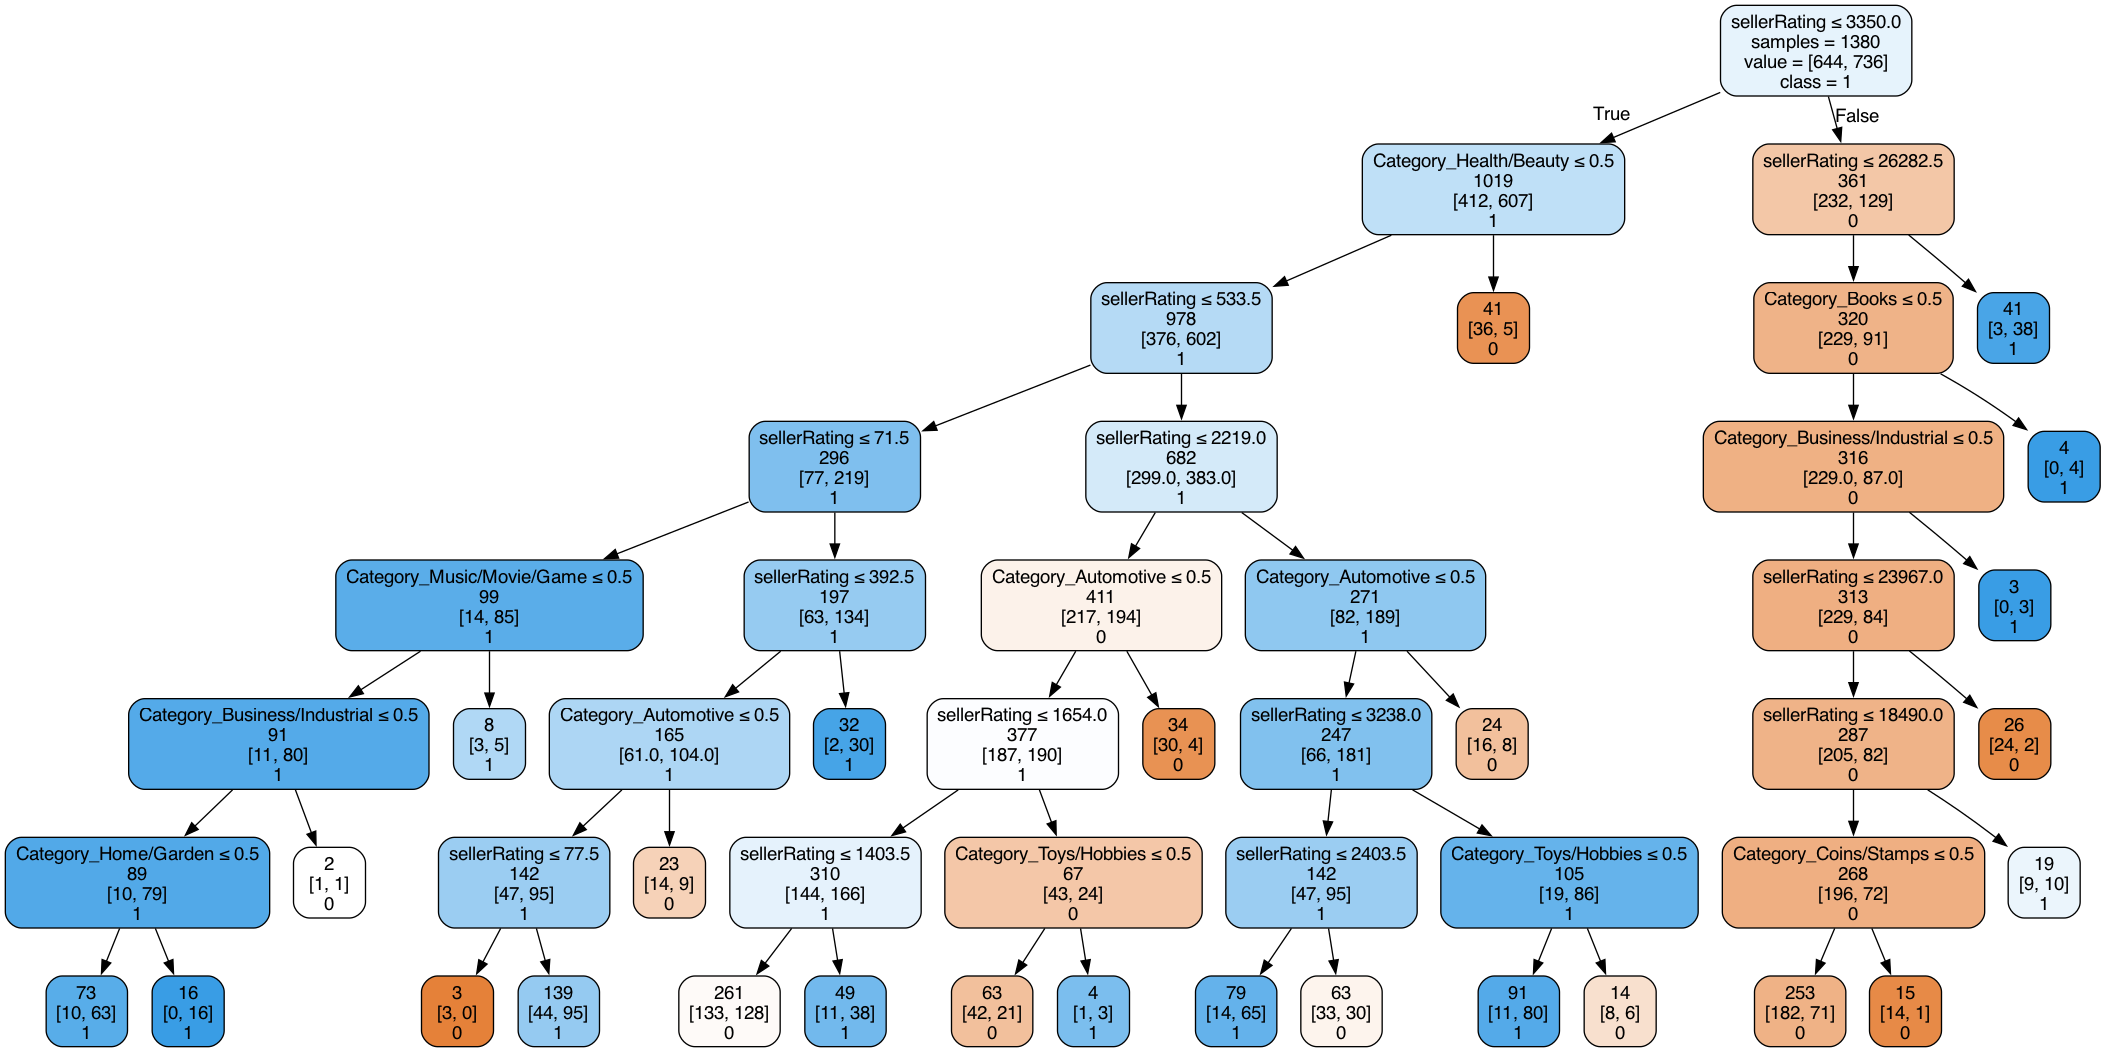

In [18]:
plotDecisionTree(classTree_2, feature_names=ebayauctions_df_selected_cols_encoded.columns.drop('Competitive?'), class_names=classTree_2.classes_)

In [19]:
print(classificationSummary(y_test_2, y_preds_2))

Confusion Matrix (Accuracy 0.6774)

       Prediction
Actual   0   1
     0 198  64
     1 127 203
None


In [20]:
importances = classTree_2.feature_importances_
columns = classTree_2.feature_names_in_

feature_importance_df = pd.DataFrame({
    'Feature': columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [21]:
feature_importance_df

,Feature,Importance
0,sellerRating,0.697473
1,Category_Automotive,0.105619
10,Category_Health/Beauty,0.104693
17,Category_Toys/Hobbies,0.034028
2,Category_Books,0.022653
3,Category_Business/Industrial,0.020580
5,Category_Coins/Stamps,0.007079
13,Category_Music/Movie/Game,0.005186
11,Category_Home/Garden,0.002689
4,Category_Clothing/Accessories,0.000000


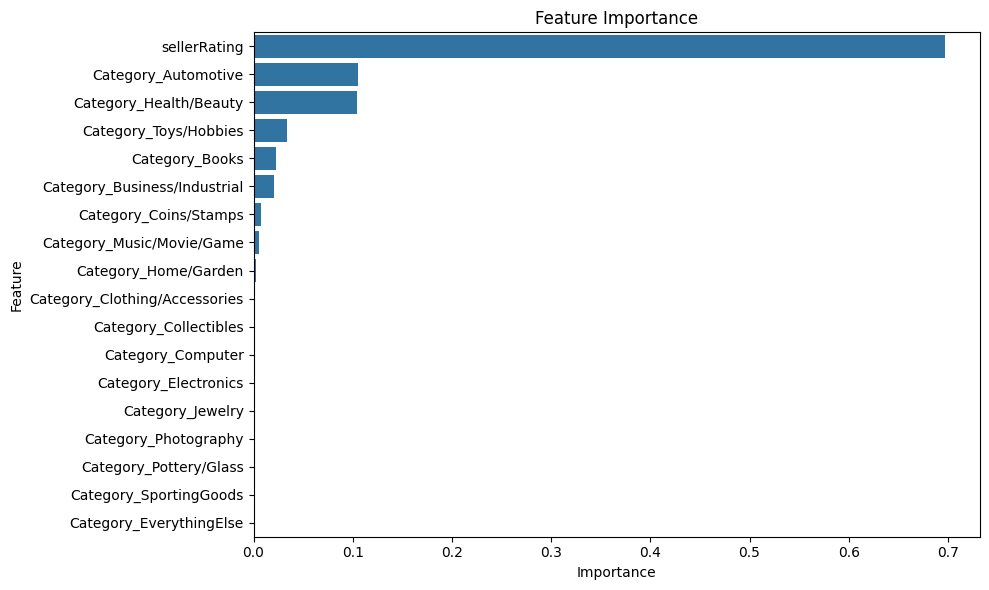

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


From the 2nd model we can see that the `sellerRating` feature has the most weightage and hence is a significant predictor

Hence I'll encourage my friend to work on improving their rating by maintaining good feedback from buyers. Higher ratings can lead to more competitive auctions, as buyers may be more willing to bid on items from trusted sellers.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## UniversalBank 

In [70]:
bank_df = pd.read_csv('UniversalBank.csv')

bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [71]:
len(bank_df)

5000

In [72]:
bank_df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

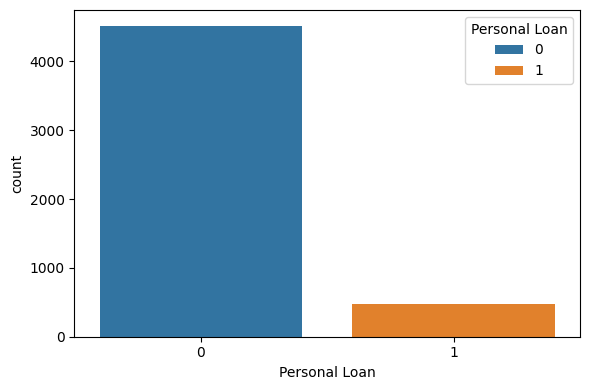

In [73]:
plt.figure(figsize=(6,4))
sns.countplot(x='Personal Loan', hue='Personal Loan', data=bank_df)
plt.tight_layout()
plt.show()

In [74]:
bank_df = bank_df.drop(['ID', 'ZIP Code'], axis=1)

In [75]:
X = bank_df.drop('Personal Loan', axis=1)
y = bank_df['Personal Loan']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

In [77]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_preds = knn.predict(X_test)

In [78]:
# accuracy on the validation set 
print(classificationSummary(y_test, y_preds))

Confusion Matrix (Accuracy 0.9060)

       Prediction
Actual    0    1
     0 1298   42
     1   99   61
None


In [79]:
# Train a classifier for different values of k

results = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.904667
1    2  0.910000
2    3  0.906000
3    4  0.904000
4    5  0.903333
5    6  0.904000
6    7  0.902667
7    8  0.900667
8    9  0.903333
9   10  0.904000
10  11  0.895333
11  12  0.900000
12  13  0.895333
13  14  0.898667
14  15  0.896667
15  16  0.893333
16  17  0.894000
17  18  0.892000
18  19  0.890667
19  20  0.894000


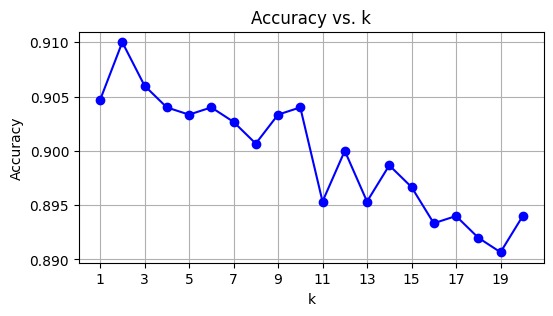

In [80]:
plt.figure(figsize=(6, 3))
plt.plot(results['k'], results['accuracy'], marker='o', color='b', linestyle='-')
plt.title("Accuracy vs. k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.xticks(np.arange(min(results['k']), max(results['k']) + 1, 2)) 
plt.grid(True)
plt.show()

According to the above graph we get the highest accuracy on the validation set when k = 2, which is 0.910000

When k = 3 the accuracy is 0.906000 and for subsequent k values the accuracy keeps decreasing. Hence the best value of k is 2 and in
general till k=3 we get good accuracy but after that for higher k values the accuracy flattens out and starts decreasing so there's no point
in choosing a higher k value as it will only increase the complexity of our model.

In [34]:
# Making a generic function to split the dataset and train-evaluate the model for classification tree

def train_and_evaluate(X, y, depth=None):
    # Perform the train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

    classTree = DecisionTreeClassifier(random_state=0, max_depth=depth, min_samples_split=50)

    # Fit the model
    classTree.fit(X_train, y_train)

    # Make predictions
    y_preds = classTree.predict(X_test)

    # Return the model, test set, and predictions
    return classTree, y_test, y_preds, X_test

In [35]:
classTree1, y_test1, y_preds1, X_test1 = train_and_evaluate(X, y, depth=None)

In [36]:
classTree2, y_test2, y_preds2, X_test2 = train_and_evaluate(X, y, depth=10)

In [37]:
print(classificationSummary(y_test1, y_preds1))

Confusion Matrix (Accuracy 0.9813)

       Prediction
Actual    0    1
     0 1333    7
     1   21  139
None


In [38]:
print(classificationSummary(y_test2, y_preds2))

Confusion Matrix (Accuracy 0.9813)

       Prediction
Actual    0    1
     0 1333    7
     1   21  139
None


In classification tree we're getting the accuracy on the validation set as 0.9813 when max_depth is 10 and also when its None

In KNN we're getting the best accuracy as 0.9100 when k = 2, we can see that the accuracy in a classification tree is higher than KNN on the validation set
and hence classification tree is the best model here

### Drishya AI Labs

In [83]:
alarms_df = pd.read_excel('alarms.xlsx', sheet_name='Training Data 20000')

In [40]:
alarms_df.head()

,SO,ATD,CHB,M,Alarm Tag Type,Flow,Level,Pressure,Temperature,Others,H,Hour:0-6,Hour:7-12,Hour:13-18,Hour:19-24,Week,1st Week,2nd week,3rd week,4th week
0,XI-3057,0,0,6,Others,0,0,0,0,1,7-12,0,1,0,0,4th Week,0,0,0,1
1,XI-3057,0,0,7,Others,0,0,0,0,1,13-18,0,0,1,0,2nd Week,0,1,0,0
2,XI-3057,0,0,7,Others,0,0,0,0,1,13-18,0,0,1,0,2nd Week,0,1,0,0
3,XI-3057,0,0,10,Others,0,0,0,0,1,13-18,0,0,1,0,2nd Week,0,1,0,0
4,XI-3057,0,0,10,Others,0,0,0,0,1,7-12,0,1,0,0,2nd Week,0,1,0,0


In [41]:
len(alarms_df)

20000

In [42]:
alarms_df.isna().sum()

SO                0
ATD               0
CHB               0
M                 0
Alarm Tag Type    0
Flow              0
Level             0
Pressure          0
Temperature       0
Others            0
H                 0
Hour:0-6          0
Hour:7-12         0
Hour:13-18        0
Hour:19-24        0
Week              0
1st Week          0
2nd week          0
3rd week          0
4th week          0
dtype: int64

In [43]:
alarms_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ATD,20000.0,201.59225,418.470404,0.0,6.0,29.0,162.0,2503.0
CHB,20000.0,0.22830,0.419747,0.0,0.0,0.0,0.0,1.0
M,20000.0,6.76045,3.592424,1.0,4.0,7.0,10.0,12.0
Flow,20000.0,0.14830,0.355406,0.0,0.0,0.0,0.0,1.0
Level,20000.0,0.35935,0.479822,0.0,0.0,0.0,1.0,1.0
Pressure,20000.0,0.16100,0.367540,0.0,0.0,0.0,0.0,1.0
Temperature,20000.0,0.11925,0.324091,0.0,0.0,0.0,0.0,1.0
Others,20000.0,0.21210,0.408806,0.0,0.0,0.0,0.0,1.0
Hour:0-6,20000.0,0.23080,0.421355,0.0,0.0,0.0,0.0,1.0
Hour:7-12,20000.0,0.26860,0.443242,0.0,0.0,0.0,1.0,1.0


In [44]:
alarms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SO              20000 non-null  object
 1   ATD             20000 non-null  int64 
 2   CHB             20000 non-null  int64 
 3   M               20000 non-null  int64 
 4   Alarm Tag Type  20000 non-null  object
 5   Flow            20000 non-null  int64 
 6   Level           20000 non-null  int64 
 7   Pressure        20000 non-null  int64 
 8   Temperature     20000 non-null  int64 
 9   Others          20000 non-null  int64 
 10  H               20000 non-null  object
 11  Hour:0-6        20000 non-null  int64 
 12  Hour:7-12       20000 non-null  int64 
 13  Hour:13-18      20000 non-null  int64 
 14  Hour:19-24      20000 non-null  int64 
 15  Week            20000 non-null  object
 16  1st Week        20000 non-null  int64 
 17  2nd week        20000 non-null  int64 
 18  3rd we

In [84]:
# Fitting KNN and Decision Tree on the dataset

alarm_df_numerical = alarms_df.drop(['SO', 'Alarm Tag Type', 'H', 'Week'], axis=1)

In [85]:
alarm_df_numerical.head()

,ATD,CHB,M,Flow,Level,Pressure,Temperature,Others,Hour:0-6,Hour:7-12,Hour:13-18,Hour:19-24,1st Week,2nd week,3rd week,4th week
0,0,0,6,0,0,0,0,1,0,1,0,0,0,0,0,1
1,0,0,7,0,0,0,0,1,0,0,1,0,0,1,0,0
2,0,0,7,0,0,0,0,1,0,0,1,0,0,1,0,0
3,0,0,10,0,0,0,0,1,0,0,1,0,0,1,0,0
4,0,0,10,0,0,0,0,1,0,1,0,0,0,1,0,0


In [86]:
# Fitting KNN and Decision Tree on the dataset
# splitting into X and y
X = alarm_df_numerical.drop('CHB', axis=1)
y = alarm_df_numerical['CHB']

In [87]:
# splitting into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

In [52]:
results = []
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.865667
1    2  0.874000
2    3  0.878667
3    4  0.879000
4    5  0.880333
5    6  0.885667
6    7  0.883167
7    8  0.879167
8    9  0.881000
9   10  0.876167
10  11  0.873500
11  12  0.874167
12  13  0.870667
13  14  0.873833
14  15  0.871167
15  16  0.871167
16  17  0.871500
17  18  0.872500
18  19  0.871667


In [88]:
knn = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)

In [89]:
y_preds_knn = knn.predict(X_test)

In [90]:
print(classificationSummary(y_test, y_preds_knn))

Confusion Matrix (Accuracy 0.8790)

       Prediction
Actual    0    1
     0 4372  234
     1  492  902
None


In [53]:
classTree, y_test, y_preds, X_test = train_and_evaluate(X, y, depth=None)

In [54]:
print(classificationSummary(y_test, y_preds))

Confusion Matrix (Accuracy 0.8830)

       Prediction
Actual    0    1
     0 4284  322
     1  380 1014
None


KNN best accuracy = 0.879000 when k = 4
decision tree accuracy = 0.8830 when max_depth = None